# 4.2 Posterior for normal distribution

# importing packages 

In [1]:
using Distributions
using Plots
# using PyPlot
pyplot()
using LaTeXStrings

In [2]:
#initialising parameters
truemu = 180
truesigmasquared = 15
n = 5
meshsize = 1000
dist = Normal(truemu, sqrt(truesigmasquared))

Normal{Float64}(μ=180.0, σ=3.872983346207417)

In [3]:
mu = range(170, stop = 190, length = meshsize);
s2 = range(0.1, stop = 100, length = meshsize);
prior = ones(meshsize, meshsize);
likelihood = zeros(meshsize, meshsize);
posterior = zeros(meshsize, meshsize);

#generating X
X = rand(dist, n)

#likelihood calculation
for x in X
    for i in 1:meshsize
        for j in 1:meshsize
            likelihood[i, j] = pdf(Normal(mu[i], sqrt(s2[j])), x)
            posterior[i, j] = likelihood[i, j] * prior[i, j]
        end
    end
    N = sum(posterior)
    posterior = posterior ./ N
    prior = posterior
end

In [4]:
# heatmap(s2, mu, posterior, xlabel = L"\sigma ^2", ylabel = L"\mu", title = "My posterior", seriescolor = :ice)

# estimating parameters

In [5]:
muhat = sum(X)/size(X)[1]
s2hat = sum((X .- muhat) .^ 2)/size(X)[1]

peakmu = mu[findmax(posterior)[2][1]]
peaks2 = s2[findmax(posterior)[2][2]]

println("X = ", X)
println("muhat = ", muhat)
println("s2hat = ", s2hat)
println("posterior peaks at mu = ", peakmu, " and sigma^2 = ", peaks2)

X = [178.751, 180.035, 175.21, 187.732, 178.454]
muhat = 180.0365599602669
s2hat = 17.335310438923152
posterior peaks at mu = 180.03003003003002 and sigma^2 = 17.3


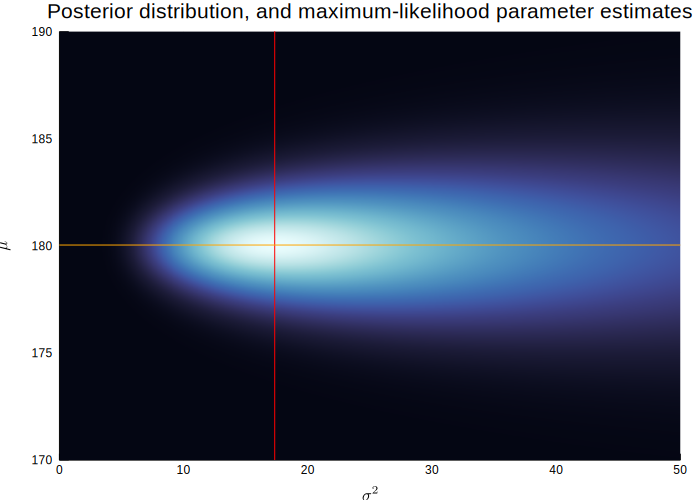

In [6]:
# theme(:delta)
# Plots.ColorScheme(:heat)
gr(size = (700, 500), legend = :topright)
heatmap(s2, mu, posterior, seriescolor = :ice, 
        title = "Posterior distribution, and maximum-likelihood parameter estimates",
        xlabel = L"\sigma ^2", ylabel = L"\mu", legend = :none)
vline!([s2hat], label = "maximum-likelihood sigma^2", linecolor = :red)
hline!([muhat], label = "maximum-likelihood mu", linecolor = :orange)
xlims!((0, 50))

# marginals

In [7]:
mumarginal = sum(posterior, dims = 2);
s2marginal = (sum(posterior, dims = 1))[:];

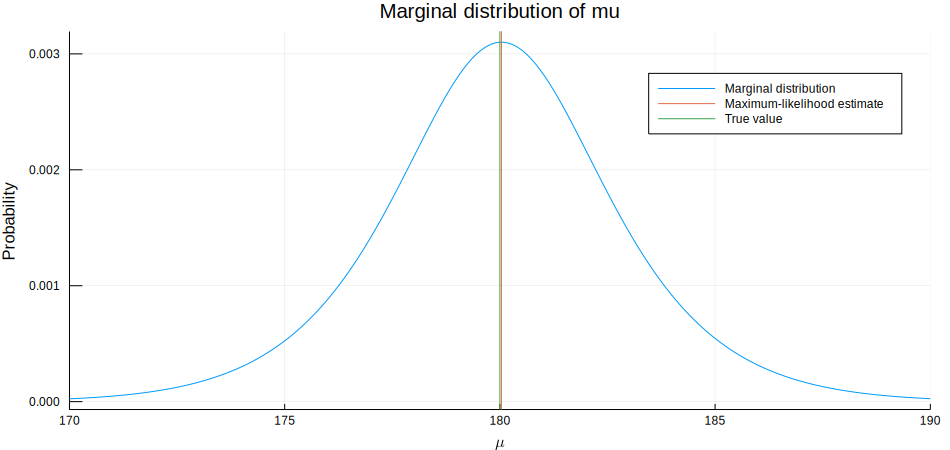

In [8]:
# theme(:juno)
gr(size = (950, 450))
plot(mu, mumarginal, label = "Marginal distribution", legend = :topright, ylabel = "Probability", xlabel = L"\mu",
    title = "Marginal distribution of mu")
vline!([muhat], label = "Maximum-likelihood estimate")
vline!([truemu], label = "True value")
xlims!((170, 190))

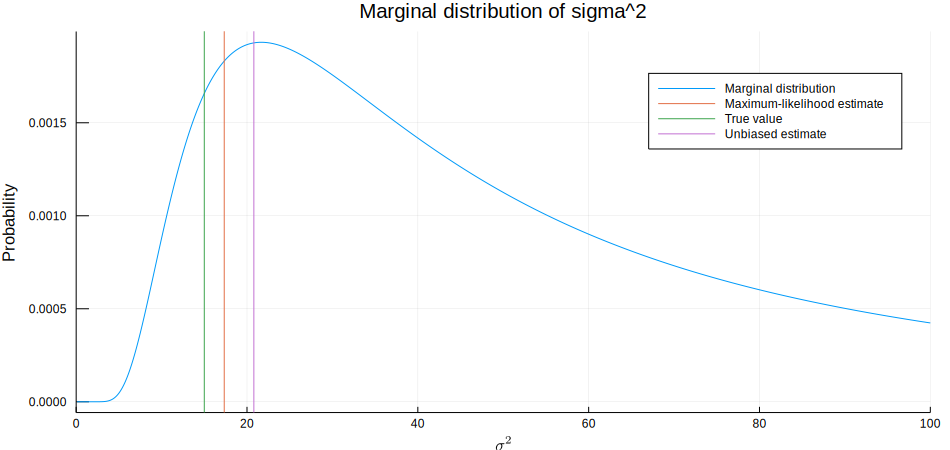

In [9]:
plot(s2, s2marginal, label = "Marginal distribution", legend = :topright, ylabel = "Probability", 
    xlabel = L"\sigma ^2", title = "Marginal distribution of sigma^2")
vline!([s2hat], label = "Maximum-likelihood estimate")
vline!([truesigmasquared], label = "True value")
xlims!((0, 100))
vline!([(n+1)/n*s2hat], label = "Unbiased estimate")

# plot(p1, p2, layout = (2, 1))